In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

import statsmodels.api as sm
import statsmodels.formula.api as smf


In [6]:
##
## let's try to work it out with my amazon data
##
##
##
from sklearn.cluster import KMeans

In [7]:
amazon = pd.read_csv("nodes.csv")

In [8]:
# make an ordered list and dictionary with all the nodes
all_nodes = set()
for nodes in amazon['nodelist']:
    all_nodes = all_nodes.union(eval(nodes))
all_nodes = list(all_nodes)
node_dict = dict(zip(all_nodes,range(0,len(all_nodes))))
dict_node = dict(zip(range(0,len(all_nodes)),all_nodes))

#  empty matrix 
mat = np.zeros(shape=(len(amazon['nodelist']),len(node_dict)))

# make the count matrix for each of node for each nodelist set 
counter = 0
for nodes in amazon['nodelist']:
    nodes = eval(nodes)
    for node in nodes:
        row = counter
        column = node_dict[node]
        mat[row, column] += 1
    counter += 1

there is the plot for 2 clusters


/Users/noahburbank/anaconda/envs/py2/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


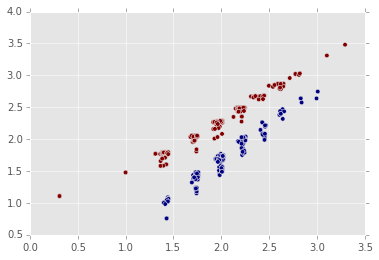



there is the plot for 3 clusters


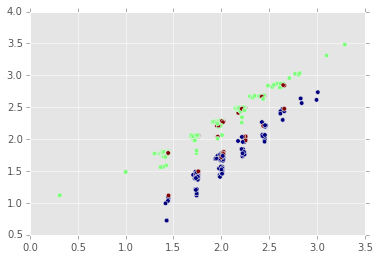



there is the plot for 4 clusters


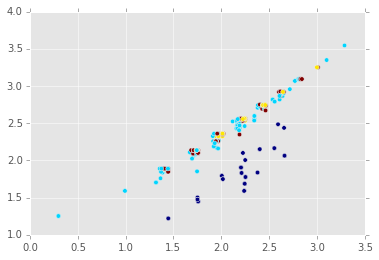



there is the plot for 5 clusters


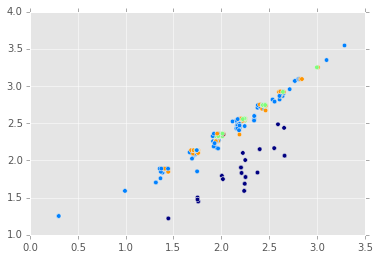



there is the plot for 6 clusters


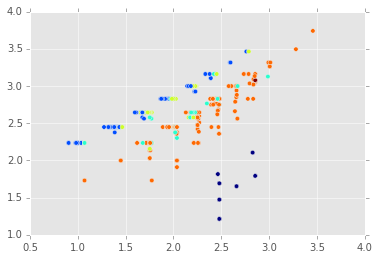



there is the plot for 7 clusters


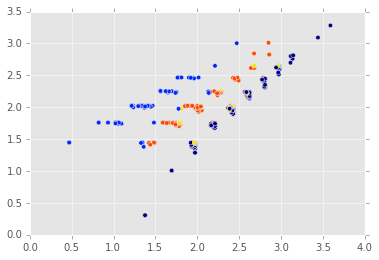



there is the plot for 8 clusters


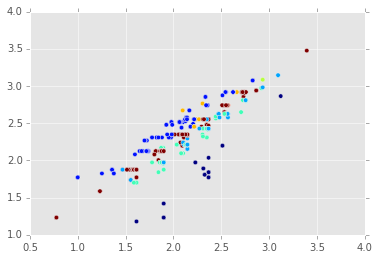



there is the plot for 9 clusters


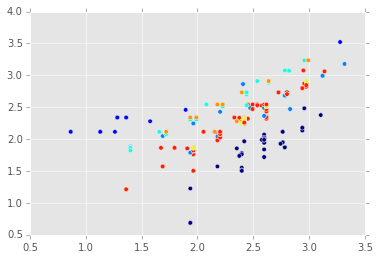



there is the plot for 10 clusters


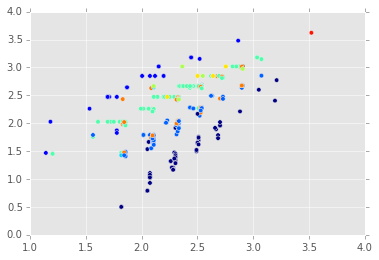



there is the plot for 11 clusters


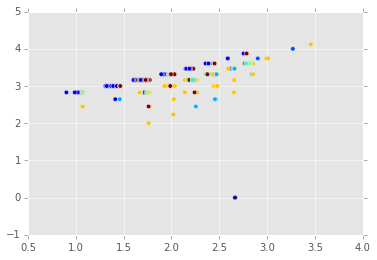



there is the plot for 12 clusters


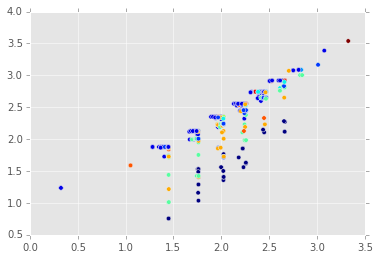



there is the plot for 13 clusters


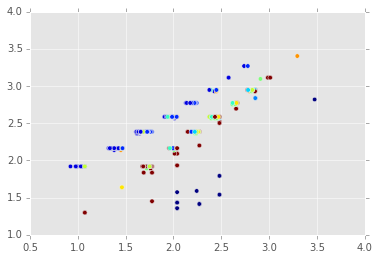



there is the plot for 14 clusters


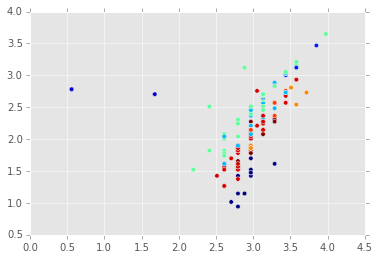



there is the plot for 15 clusters


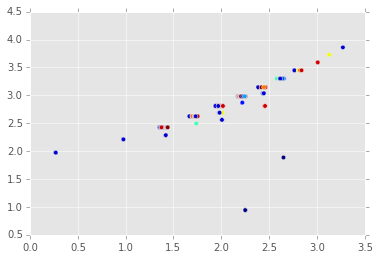



there is the plot for 16 clusters


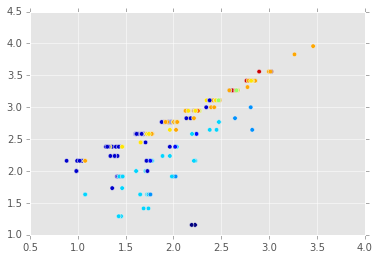



there is the plot for 17 clusters


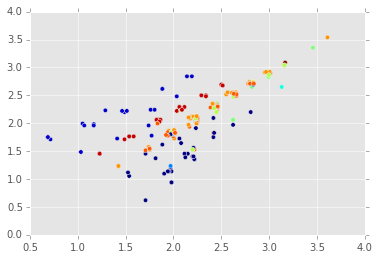



there is the plot for 18 clusters


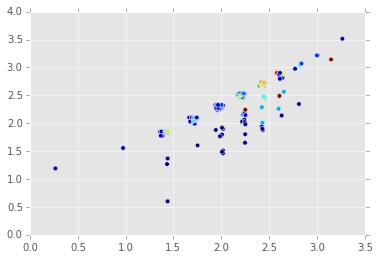



there is the plot for 19 clusters


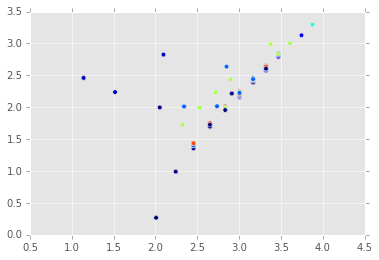

In [9]:
clus_count = 2

while clus_count < 20:

    X = mat

    kmeans = KMeans(n_clusters = clus_count, random_state = 27)#, init= 'random' )    #, verbose = 'TRUE')
    kmeans = kmeans.fit(X)
    what = kmeans.transform(X)
    z = pd.DataFrame(what)

    clusters = kmeans.predict(X)

    print "there is the plot for " + str(clus_count) + " clusters"
    plt.scatter(z[1], z[0], c = clusters)
    plt.show()
    print
    print
    
    clus_count += 1

there is the plot for 4 clusters


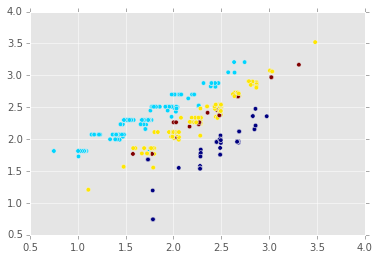



Cluster 1 words:
['Memoirs', 'Women', 'Reference', 'Humor', 'Literary', 'Travelers & Explorers', 'General']

Cluster 2 words:
['United States', 'Suspense', 'Mystery', 'Contemporary', 'Literary', 'Murder', 'Women Sleuths']

Cluster 3 words:
['Humor', 'Contemporary', 'Friendship', 'Fantasy', 'Science Fiction', 'Action & Adventure', 'Fantasy & Magic']

Cluster 4 words:
['Reference', 'State & Local', 'Illness', 'Serial Killers', 'Economics', 'Criticism & Theory', 'Cognitive Psychology']



In [10]:
num_clusts = 4
words_per = 7
X = mat
kmeans = KMeans(n_clusters = num_clusts) #, random_state = 27)#, init= 'random' )    #, verbose = 'TRUE')
kmeans = kmeans.fit(X)
what = kmeans.transform(X)
z = pd.DataFrame(what)
clusters = kmeans.predict(X)
print "there is the plot for " + str(num_clusts) + " clusters"
plt.scatter(z[1], z[0], c = clusters)
plt.show()
print
print
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1] 
for i in range(num_clusts):
    print("Cluster %d words:" % (i+1)) #, end='')
    words = list()
    for ind in order_centroids[i, :words_per]:  
        words.append(dict_node[ind])
    print words
    print

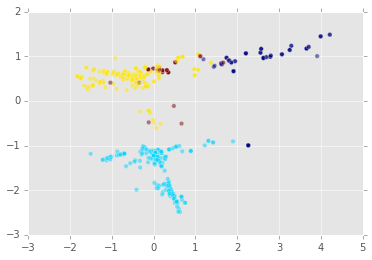

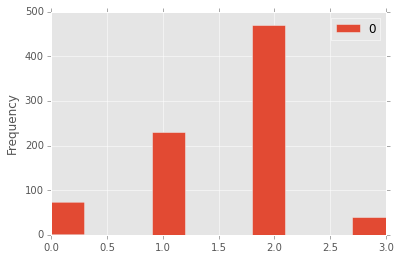

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components = num_clusts, whiten = 'TRUE')
pca = pca.fit(X)

what = pca.transform(X)
z = pd.DataFrame(what)

clusters = kmeans.predict(X)

plt.scatter(z[1], z[0], c = clusters, alpha = .5)
plt.show()

pd.DataFrame(clusters).plot(kind = 'hist')

In [12]:
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1] 

print sorted(kmeans.cluster_centers_[1], reverse = 1)[0:10]
print
print kmeans.cluster_centers_.argsort()
print 
print kmeans.cluster_centers_.argsort()[:, ::-1] 

[1.0000000000000027, 0.3347826086956518, 0.12608695652173907, 0.1130434782608695, 0.10869565217391318, 0.095652173913043537, 0.091304347826086749, 0.06956521739130439, 0.060869565217391244, 0.056521739130434845]

[[281 452  72 ...,  45 142  41]
 [167 307 418 ...,  27 104 323]
 [ 41 159  52 ...,  95 281 290]
 [225  22 240 ..., 157 443  45]]

[[ 41 142  45 ...,  72 452 281]
 [323 104  27 ..., 418 307 167]
 [290 281  95 ...,  52 159  41]
 [ 45 443 157 ..., 240  22 225]]


In [13]:
print dict_node[323]
print dict_node[290]
print
print dict_node[281]
print dict_node[374]

United States
Humor

Contemporary
Satire
